In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("test.csv")

In [3]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
data.dropna(subset=["Embarked"],inplace=True)
data["Cabin"] = data["Cabin"].fillna("Unknown")
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [10]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [11]:
data.duplicated().sum()

0

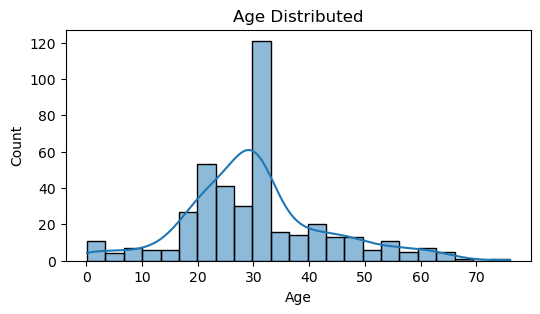

In [12]:
plt.figure(figsize=(6,3))
sns.histplot(data["Age"],kde=True)
plt.title("Age Distributed")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\tarua\AppData\Local\Temp\ipykernel_5016\3557363913.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Survived",loc="upper right")


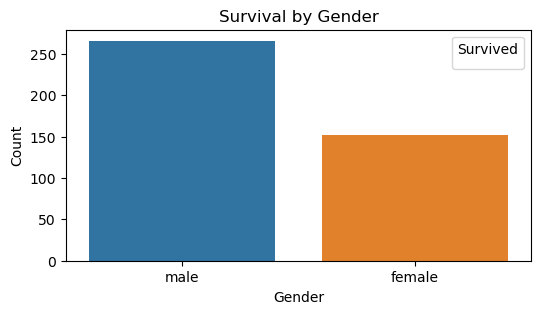

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(data=data,x="Sex",hue="Sex")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived",loc="upper right")
plt.show()


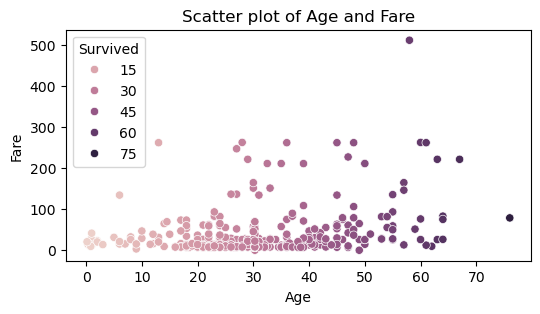

In [17]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x="Age",y="Fare", hue="Age")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

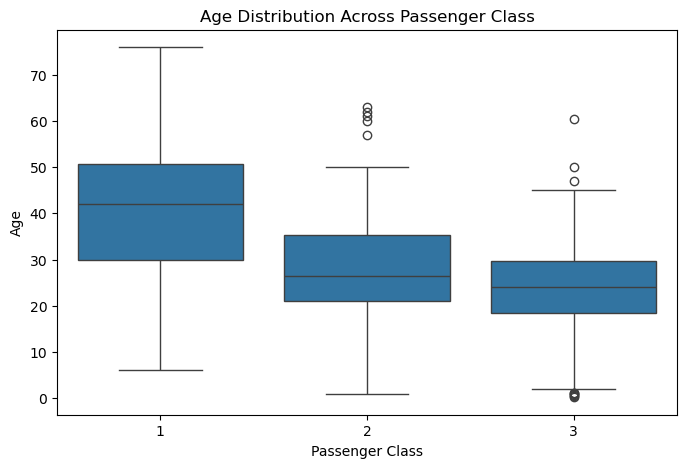

In [4]:
# Age distribution across Pclass
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Age Distribution Across Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

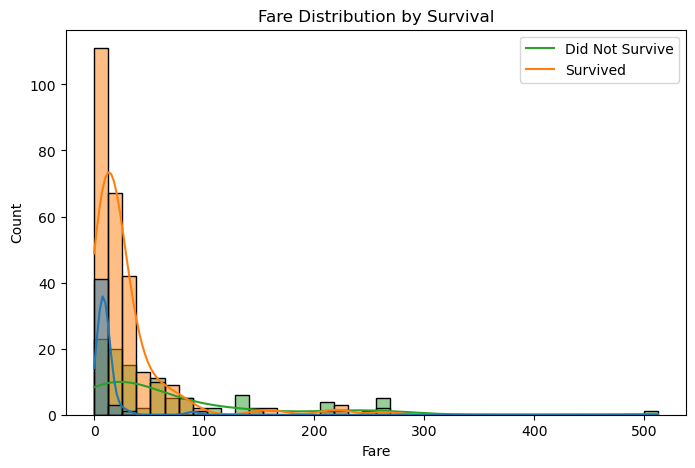

In [14]:
# Fare distribution by survival
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Fare', hue='Embarked', bins=40, kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

In [6]:
print(data.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


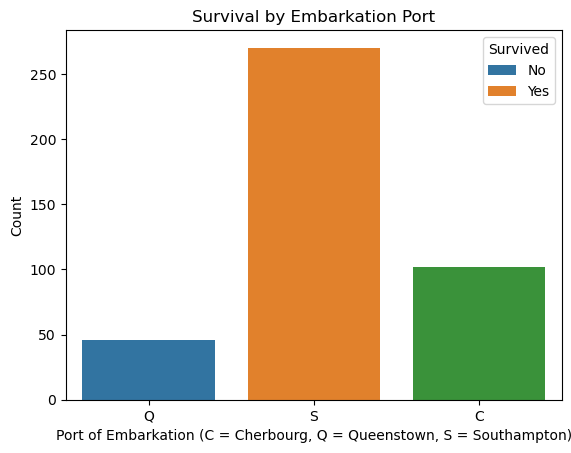

In [12]:
# Check survival rate based on embarkation port
sns.countplot(x='Embarked', hue='Embarked', data=data)
plt.title('Survival by Embarkation Port')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

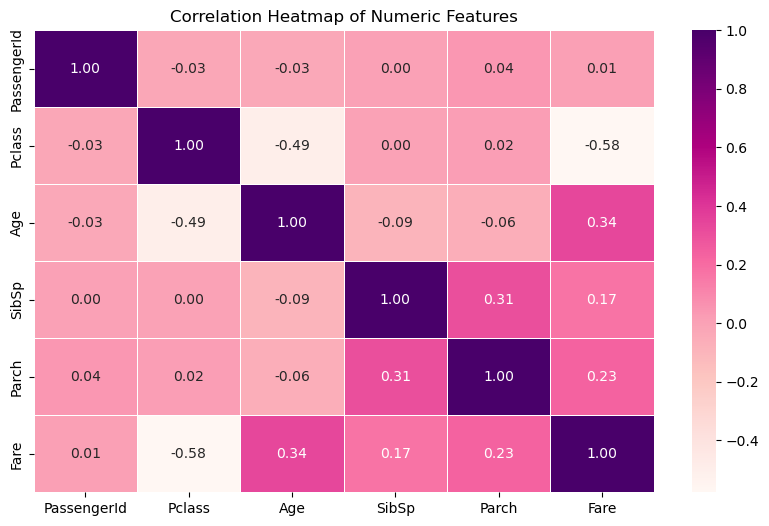

In [15]:
#CORRELATION HEATMAP
# Select only numeric columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Draw correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()